# Driver Kaggle

I start by downloading and and unziping the competition data from Kaggle and ensure my directory structure looks like this
```
utils/
    vgg16.py
    utils.py
lesson1/
    driver_kaggle.ipynb
    data/
        driver/
            train/
                ...
            test/
                ...
```
```$ sudo apt-get install python-pip python-dev build-essential 
$ sudo pip install --upgrade pip 
$ sudo pip install --upgrade virtualenv 
$ sudo apt-get install kaggle-cli
$ kg download -u 'username' -p 'pwd' -c 'state-farm-distracted-driver-detection'
$ sudo apt-get install ffmpeg #if need to get out of MemoryError```

You can download the data files from the competition page [here](https://www.kaggle.com/c/state-farm-distracted-driver-detection/data) or you can download them from the command line using the [Kaggle CLI](https://github.com/floydwch/kaggle-cli).

Then I launch your notebook inside the lesson1 directory
```
cd lesson1
jupyter notebook
```

In [1]:
%cd
%cd /Users/ssicard/goinfre/nbs/lesson1
%pwd

/Users/ssicard
/Volumes/Storage/goinfre/ssicard/nbs/lesson1


'/Volumes/Storage/goinfre/ssicard/nbs/lesson1'

In [2]:
%cd /Users/ssicard/goinfre/nbs/lesson1/data/driver/train

/Volumes/Storage/goinfre/ssicard/nbs/lesson1/data/driver/train


In [3]:
%mkdir ../valid
%mkdir ../results

## Action Plan
1. Create Validation and Sample sets
2. Rearrange image files into their respective directories 
3. Finetune and Train model
4. Generate predictions
5. Validate predictions
6. Submit predictions to Kaggle

In [13]:
%matplotlib inline
path = '/Users/ssicard/goinfre/nbs/lesson1/data/driver/'
result_path = '/Users/ssicard/goinfre/nbs/lesson1/data/driver/results/'
%cd
%cd /Users/ssicard/goinfre/nbs/

/Users/ssicard
/Volumes/Storage/goinfre/ssicard/nbs


In [14]:
import os, json
from glob import glob
import numpy as np

from utils import *
%cd
%cd /Users/ssicard/goinfre/nbs/lesson1/data/driver/train

/Users/ssicard
/Volumes/Storage/goinfre/ssicard/nbs/lesson1/data/driver/train


#### <font color=blue> Create validation set and sample</font>

In [15]:
%mkdir ../valid

In [16]:
for d in glob('c?'):
    os.mkdir('../valid/'+d)
    g = glob(d+'/*.jpg')
    shuf = np.random.permutation(g)
    for i in range(5):
        os.rename(shuf[i], '../valid/' + shuf[i])

In [17]:
%mkdir ../sample

In [18]:
for d in glob('c?'):
    os.mkdir('../sample/'+d)
    g = glob(d+'/*.jpg')
    shuf = np.random.permutation(g)
    for i in range(50):
        os.rename(shuf[i], '../sample/' + shuf[i])

In [19]:
%cd /Volumes/Storage/goinfre/ssicard/nbs

/Volumes/Storage/goinfre/ssicard/nbs


#### <font color=blue> Finetuning and train</font>

In [20]:
from imp import reload
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [21]:
vgg = Vgg16()

/Volumes/Storage/goinfre/ssicard/nbs/vgg16.py:100: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
/Volumes/Storage/goinfre/ssicard/nbs/vgg16.py:100: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
/Volumes/Storage/goinfre/ssicard/nbs/vgg16.py:100: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
/Volumes/Storage/goinfre/ssicard/nbs/vgg16.py:100: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))


In [22]:
batch_size=2

In [23]:
%cd /Volumes/Storage/goinfre/ssicard/nbs/lesson1/

/Volumes/Storage/goinfre/ssicard/nbs/lesson1


In [24]:
batches = vgg.get_batches('/Volumes/Storage/goinfre/ssicard/nbs/lesson1/data/driver/sample', batch_size=batch_size)
val_batches = vgg.get_batches('/Volumes/Storage/goinfre/ssicard/nbs/lesson1/data/driver/valid', batch_size=batch_size)

Found 500 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [25]:
vgg.finetune(batches)

In [26]:
vgg.fit(batches, val_batches, nb_epoch=0.01)

/Volumes/Storage/goinfre/ssicard/nbs/vgg16.py:213: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  validation_data=val_batches, nb_val_samples=val_batches.samples)
/Volumes/Storage/goinfre/ssicard/nbs/vgg16.py:213: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., validation_steps=50, epochs=0.01, steps_per_epoch=250)`
  validation_data=val_batches, nb_val_samples=val_batches.samples)


Epoch 1/0
250/250 [==============================] - 688s - loss: 4.3753 - acc: 0.1860 - val_loss: 2.1363 - val_acc: 0.3600


In [28]:
vgg.classes[:10]

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

#### <font color=blue> Generate Prodictions</font>

In [29]:
vgg.model.save_weights('/Volumes/Storage/goinfre/ssicard/nbs/lesson1/data/driver/results/driver_kaggle2.h5')

In [30]:
%cd /Volumes/Storage/goinfre/ssicard/nbs/lesson1/

/Volumes/Storage/goinfre/ssicard/nbs/lesson1


In [15]:
vgg.model.load_weights('/Volumes/Storage/goinfre/ssicard/nbs/lesson1/data/driver/results/driver_kaggle2.h5')

NameError: name 'result_path' is not defined

In [ ]:
test_path = '/Volumes/Storage/goinfre/ssicard/nbs/lesson1/data/driver/sample'
batches, preds = vgg.test(test_path, batch_size = batch_size)

Found 500 images belonging to 10 classes.


In [37]:
print preds[:5]
filenames = batches.filenames
print filenames[:5]

[[  8.9222e-01   5.5034e-03   1.4776e-03   9.2695e-04   5.1992e-02   2.2789e-03   8.7880e-03
    2.0122e-03   1.8316e-03   3.2966e-02]
 [  9.6831e-01   1.0718e-03   9.8092e-04   3.7217e-04   7.8610e-03   3.9831e-04   1.2493e-02
    7.6100e-05   1.5845e-04   8.2734e-03]
 [  7.5909e-01   4.3022e-03   6.7430e-03   1.9310e-02   7.3834e-02   4.9652e-02   3.1432e-02
    5.6641e-03   4.6081e-03   4.5370e-02]
 [  8.7894e-01   2.7474e-02   1.2221e-03   1.5561e-03   5.1976e-02   1.1134e-04   3.9778e-03
    1.2914e-03   1.0454e-03   3.2410e-02]
 [  4.5099e-01   2.9113e-02   1.5398e-03   2.0550e-02   1.2086e-01   3.7115e-02   3.6269e-03
    4.0667e-03   3.5331e-02   2.9680e-01]]
['c0/img_95728.jpg', 'c0/img_74437.jpg', 'c0/img_58721.jpg', 'c0/img_21699.jpg', 'c0/img_2813.jpg']


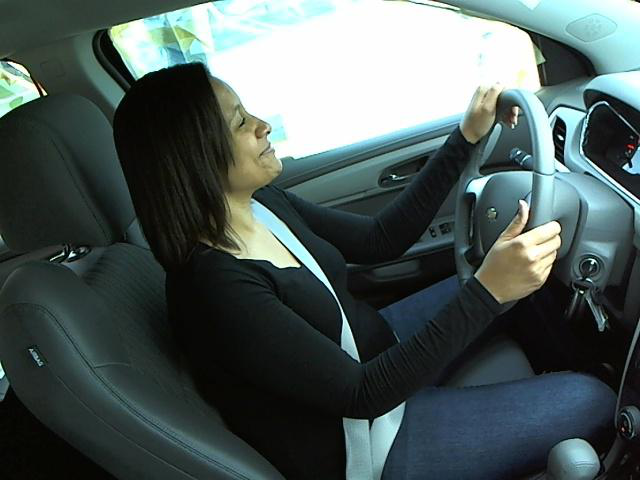

In [38]:
test_path = '/home/ubuntu/nbs/lesson1/data/driver/train/'
from PIL import Image
Image.open(test_path + filenames[2])

In [25]:
save_array('/home/ubuntu/nbs/lesson1/data/test_preds.dat', preds)
save_array('/home/ubuntu/nbs/lesson1/data/filenames.dat', filenames)

#### <font color=blue> Validate Prodictions</font>

In [39]:
%cd
%cd nbs/lesson1
vgg.model.load_weights('/home/ubuntu/nbs/lesson1/data/driver/results/driver_kaggle2.h5')

/home/ubuntu
/home/ubuntu/nbs/lesson1


In [40]:
val_batches, probs = vgg.test('/home/ubuntu/nbs/lesson1/data/driver/valid/', batch_size=batch_size)

Found 2000 images belonging to 10 classes.


In [41]:
filenames = val_batches.filenames
expected_labels = val_batches.classes #c0, c1 ... c9
our_predictions = probs[:,0]
our_labels = np.round(1-our_predictions)

In [42]:
from keras.preprocessing import image
#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img('/home/ubuntu/nbs/lesson1/data/driver/valid/' + filenames[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

#### <font color=green> Correct prediction </font>

Found 362 correct labels


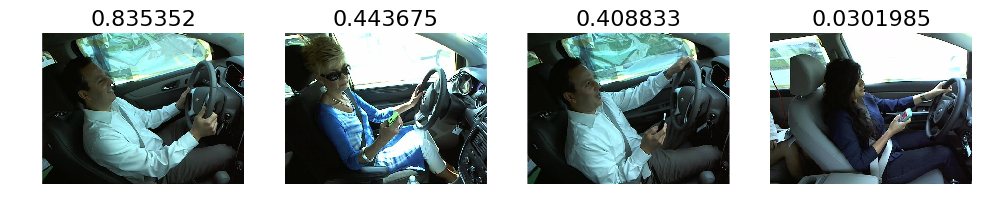

In [43]:
correct = np.where(our_labels==expected_labels)[0]
print "Found %d correct labels" % len(correct)
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

#### <font color=red> Incorrect predictions </font>

Found 1638 incorrect labels


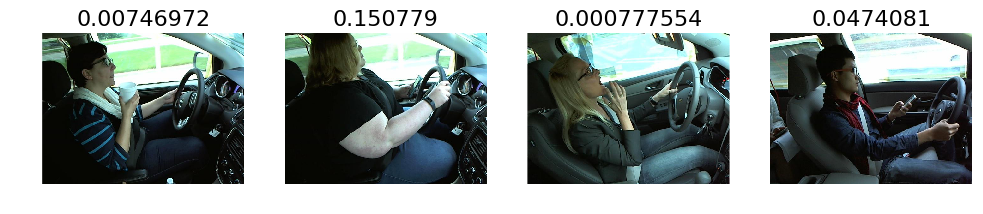

In [44]:
incorrect = np.where(our_labels!=expected_labels)[0]
print "Found %d incorrect labels" % len(incorrect)
idx = permutation(incorrect)[:n_view]
plots_idx(idx, our_predictions[idx])

In [45]:
vgg.classes[:10]

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']